In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv(r'C:\Users\jabeen\Downloads\Arif\Dataset/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
df.shape

(13200, 11)

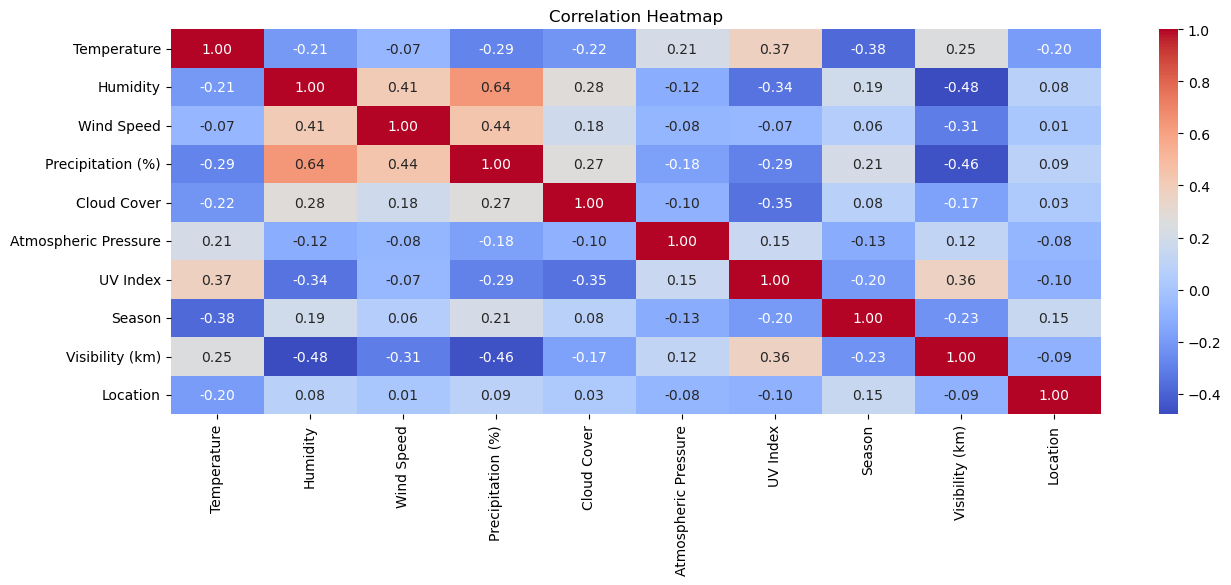

In [51]:
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [7]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
df['Cloud Cover']=label.fit_transform(df['Cloud Cover'])
df['Season']=label.fit_transform(df['Season'])
df['Location']=label.fit_transform(df['Location'])




In [8]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,Rainy
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,Cloudy
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,Sunny
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,Sunny
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,Rainy


In [9]:
x= df.drop('Weather Type',axis=1)
y=df['Weather Type']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=41)

In [11]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [12]:
svm_pred=svm.predict(x_test)
svm_pred

array(['Rainy', 'Sunny', 'Sunny', ..., 'Snowy', 'Snowy', 'Snowy'],
      dtype=object)

In [13]:
svm.score(x_test,y_test)

0.825

In [14]:
kernel1=SVC(kernel='linear')
kernel1.fit(x_train,y_train)

SVC(kernel='linear')

In [15]:
kernel1.score(x_test,y_test)

0.8712121212121212

In [16]:
kernel2=SVC(kernel='poly')
kernel2.fit(x_train,y_train)

SVC(kernel='poly')

In [17]:
kernel2.score(x_test,y_test)

0.8386363636363636

In [18]:
kernel3=SVC(kernel='rbf')
kernel3.fit(x_train,y_train)

SVC()

In [19]:
kernel3.score(x_test,y_test)

0.825

In [20]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

C:\Users\jabeen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
logistic.predict(x_test)


array(['Cloudy', 'Sunny', 'Sunny', ..., 'Snowy', 'Snowy', 'Snowy'],
      dtype=object)

In [22]:
logistic.score(x_test,y_test)

0.8484848484848485

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [24]:
knn.score(x_test,y_test)

0.8810606060606061

In [25]:
accuracy_rate=[]
for i in range(1,40):


    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    accuracy_rate.append(score)

Text(0, 0.5, 'accuracy_rate')

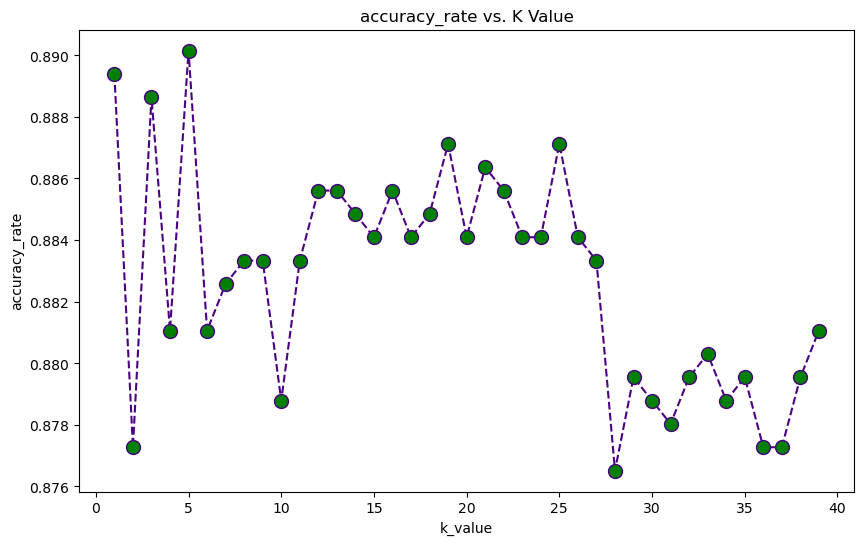

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='indigo',linestyle='dashed',marker='o',
        markerfacecolor='green',markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('k_value')
plt.ylabel('accuracy_rate')

In [27]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

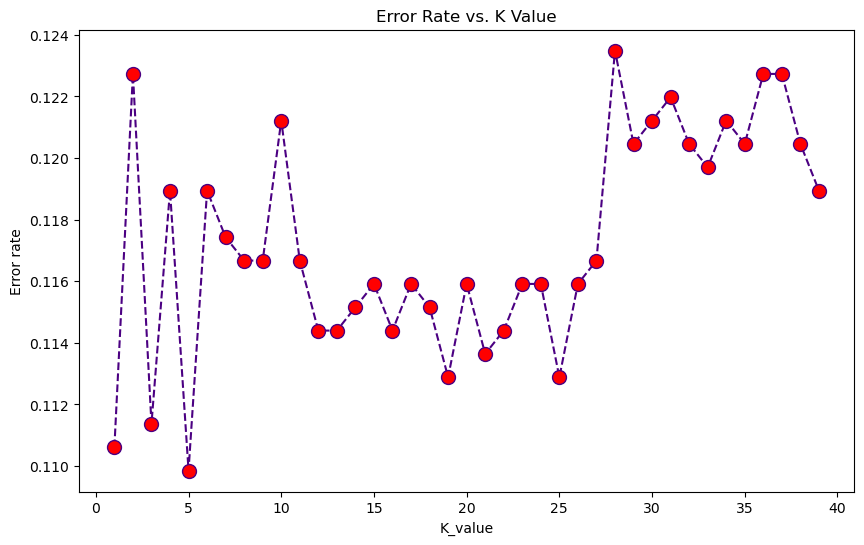

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='indigo',marker='o',linestyle='dashed',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_value')
plt.ylabel('Error rate')

In [29]:
knn1=KNeighborsClassifier(n_neighbors=6)
knn1.fit(x_train,y_train)
knn1.score(x_test,y_test)

0.8810606060606061

In [30]:
knn2=KNeighborsClassifier(n_neighbors=7)
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)

0.8825757575757576

In [31]:
knn3=KNeighborsClassifier(n_neighbors=8)
knn3.fit(x_train,y_train)
knn3.score(x_test,y_test)

0.8833333333333333

In [32]:
knn_predict=knn1.predict(x_test)

Text(0, 0.5, 'Data values')

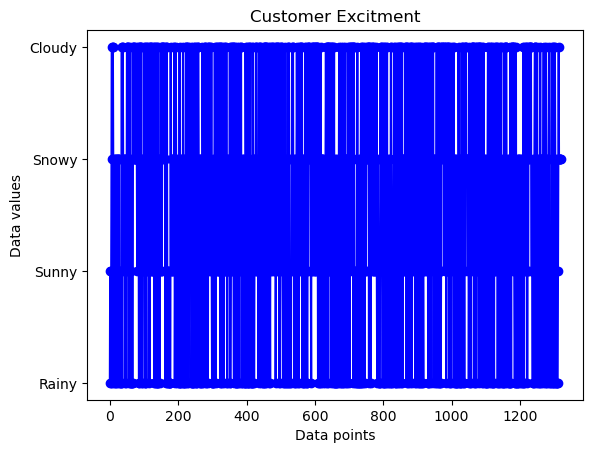

In [33]:
plt.plot(knn_predict,color='blue',linestyle='-',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [34]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [35]:
naive.predict(x_test)

array(['Cloudy', 'Sunny', 'Sunny', ..., 'Snowy', 'Snowy', 'Snowy'],
      dtype='<U6')

In [36]:
naive.score(x_test,y_test)

0.8628787878787879

In [37]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
random_predict=random.predict(x_test)
random_predict

array(['Rainy', 'Sunny', 'Sunny', ..., 'Snowy', 'Snowy', 'Snowy'],
      dtype=object)

In [39]:
random.score(x_test,y_test)

0.9136363636363637

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

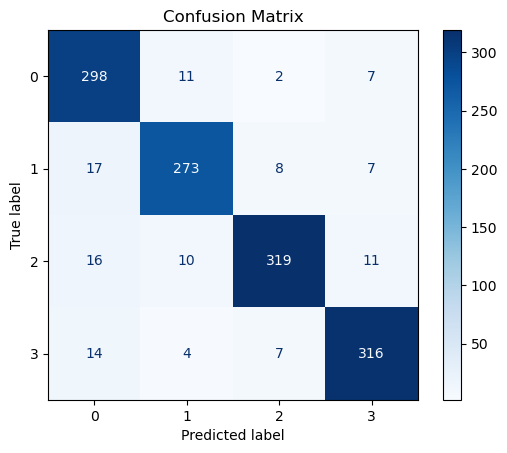

In [65]:
cm = confusion_matrix(y_test, random_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

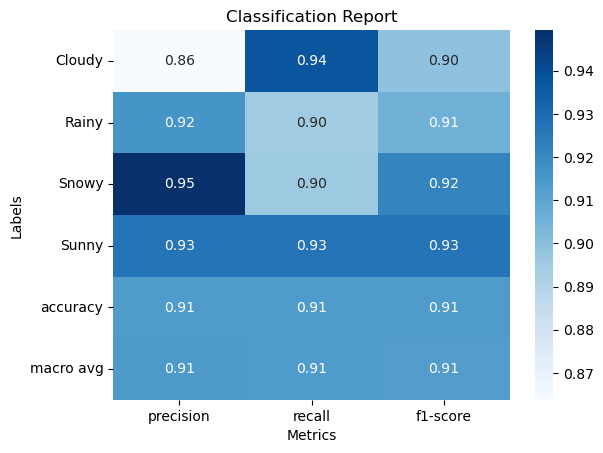

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as dictionary
report = classification_report(y_test, random_predict, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the basic heatmap
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Labels')
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
tree.predict(x_test)

array(['Rainy', 'Sunny', 'Sunny', ..., 'Snowy', 'Snowy', 'Snowy'],
      dtype=object)

In [45]:
tree.score(x_test,y_test)

0.9121212121212121

In [46]:
import xgboost as xgb
boost = xgb.XGBClassifier()
boost.fit(x_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['Cloudy' 'Rainy' 'Snowy' 'Sunny']

In [ ]:
boost.predict(x_test)

In [ ]:
boost.score(x_test,y_test)

-------------
GaussianNB
-------------

In [66]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)
guassian_pred=naive.predict(x_test)
naive.score(x_test,y_test)

0.8628787878787879

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [ ]:

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [1, 5, 10]
}

gdc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, return_train_score=True)

In [ ]:
gdc

In [ ]:
gdc.fit(x,y)

In [ ]:
gdc.best_params_

In [ ]:

from sklearn import svm

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params': {
            'gamma': [1, 10, 20],
            'C': [1, 10, 20],
            'kernel': ['rbf', 'poly', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    }
}


In [ ]:
scores=[]
for model_name in model_params:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name,'best_score':gds.best_score_,'best_params':gds.best_params_})

In [ ]:
scores

In [ ]:
models={'logistic':{'model':LogisticRegression(),'params':{}},
        'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,10,20,100]}},
        'decision_tree':{'model':DecisionTreeClassifier(),'params':{}},
        'Gaussian':{'model':GaussianNB(),'params':{}},
        'Bernauli':{'model':BernoulliNB(),'params':{}},
        'SVM':{'model':SVC(),'params':{'gamma':[1,2,100],'C':[1,2,5,100],'kernel':['poly','linear','sigmoid','rbf']}}}

result=[]
for i in models:
    a=models.get(i)
    model=a.get('model')
    params=a.get('params')
    cv=GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(x,y)
    bp=cv.best_params_
    bs=cv.best_score_
    t_res={'model':i,'best_params':bp,'best_score':bs}
    result.append(t_res)
f=pd.DataFrame(result)
        